In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('E-Com_Data.csv')
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


# Data Understanding

In [7]:
def summary(df, pred=None):
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    min = df.min()
    uniques = df.apply(lambda x:x.unique().shape[0])
    nulls = df.apply(lambda x : x.isnull().sum())
    print('Data Shape', df.shape)

    if pred is None:
        cols = ['types','counts', 'uniques', 'nulls', 'min']
        str = pd.concat([types, counts, uniques, nulls, min], axis=1, sort=True)

    str.columns = cols
    dtypes = str.types.value_counts()
    print('_____________________\n Data Types:')
    return str

details = summary(df)
display(details.sort_values(by='nulls',ascending=False))

Data Shape (541116, 12)
_____________________
 Data Types:


,types,counts,uniques,nulls,min
Sold as set,float64,0,1,541116,NaN
Reason of return,object,3,3,541113,NaN
Cancelled_status,object,8345,2,532771,True
CustomerID,float64,404189,4350,136927,2.0
Date of purchase,object,537979,382,3137,NaN
InvoieNo,float64,537979,24929,3137,361429.0
Item Code,object,537979,4010,3137,NaN
Price,float64,537979,13530,3137,-10152.0
Quantity,float64,537979,463,3137,-2003.0
Shipping Location,object,537979,21,3137,NaN


In [9]:
df.shape


(541116, 12)

In [11]:
df.dtypes

CustomerID           float64
Item Code             object
InvoieNo             float64
Date of purchase      object
Quantity             float64
Time                  object
price per Unit       float64
Price                float64
Shipping Location     object
Cancelled_status      object
Reason of return      object
Sold as set          float64
dtype: object

In [13]:
df.count()

CustomerID           404189
Item Code            537979
InvoieNo             537979
Date of purchase     537979
Quantity             537979
Time                 537979
price per Unit       537979
Price                537979
Shipping Location    537979
Cancelled_status       8345
Reason of return          3
Sold as set               0
dtype: int64

In [15]:
df.nunique()

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        2900
Price                13529
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

In [17]:
df.isnull().sum()

CustomerID           136927
Item Code              3137
InvoieNo               3137
Date of purchase       3137
Quantity               3137
Time                   3137
price per Unit         3137
Price                  3137
Shipping Location      3137
Cancelled_status     532771
Reason of return     541113
Sold as set          541116
dtype: int64

In [19]:
df.isnull().sum().sum()

1777023

In [21]:
df['Date of purchase'] = pd.to_datetime(df['Date of purchase'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          537979 non-null  object        
 2   InvoieNo           537979 non-null  float64       
 3   Date of purchase   537979 non-null  datetime64[ns]
 4   Quantity           537979 non-null  float64       
 5   Time               537979 non-null  object        
 6   price per Unit     537979 non-null  float64       
 7   Price              537979 non-null  float64       
 8   Shipping Location  537979 non-null  object        
 9   Cancelled_status   8345 non-null    object        
 10  Reason of return   3 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 49.5+ MB


In [25]:
print("Min Date :", df['Date of purchase'].min())
print()
print("Max Date :", df['Date of purchase'].max())

Min Date : 2016-02-12 00:00:00

Max Date : 2017-12-19 00:00:00


In [27]:
df.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [29]:
df.duplicated().sum()

3145

In [31]:
df = df.drop_duplicates(ignore_index=True)

In [33]:
df.duplicated().sum()

0

In [35]:
df1 = df[['CustomerID','InvoieNo', 'Date of purchase','Price']]

In [37]:
df1.shape

(537971, 4)

In [39]:
df1.duplicated().sum()

2863

In [41]:
df1 = df1.rename(columns = {'InvoieNo':'InvoiceNo', 'Date of purchase':'Date'})
df1.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,2017-10-29,1926.0
1,4352.0,394422.0,2017-05-10,1740.0
2,4352.0,394422.0,2017-12-10,1866.0
3,4352.0,388633.0,2017-08-22,1869.0
4,4352.0,394422.0,2017-10-10,1888.0


In [43]:
df1.isnull().sum()

CustomerID    133790
InvoiceNo          1
Date               1
Price              1
dtype: int64

In [45]:
df1.isnull().sum()/len(df1)*100

CustomerID    24.869370
InvoiceNo      0.000186
Date           0.000186
Price          0.000186
dtype: float64

In [47]:
df1 = df1[~(df1.CustomerID.isnull())]
df1 = df1[~(df1.Price<0)]
df1 = df1[df1.Price>0]

details = summary(df1)
display(details.sort_values(by='uniques', ascending=False))

Data Shape (395998, 4)
_____________________
 Data Types:


,types,counts,uniques,nulls,min
InvoiceNo,float64,395998,18305,0,361429.0
Price,float64,395998,8805,0,12.0
CustomerID,float64,395998,4324,0,2.0
Date,datetime64[ns],395998,381,0,2016-02-12 00:00:00


In [49]:
df1.isnull().sum()

CustomerID    0
InvoiceNo     0
Date          0
Price         0
dtype: int64

In [51]:
print("Min Date :", df1['Date'].min())
print()
print("Max Date :", df1['Date'].max())

Min Date : 2016-02-12 00:00:00

Max Date : 2017-12-19 00:00:00


In [53]:
import datetime
new_date = datetime.datetime(2017, 12, 20)
new_date

datetime.datetime(2017, 12, 20, 0, 0)

# Building RFM Analysis

In [56]:
RFMApproach = df1.groupby('CustomerID').agg({'Date': lambda x: (new_date - x.max()).days,
                                            'InvoiceNo': lambda x: x.count(),
                                            'Price': lambda x: x.sum()})
RFMApproach.rename(columns={'Date':'Recency','InvoiceNo':'Frequency','Price':'Monetary'}, inplace=True)
RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,20,72,176613.0
3,5.0,18,16,41976.0
4,6.0,9,77,166972.0
...,...,...,...,...
4319,4368.0,17,10,20480.0
4320,4369.0,181,7,10774.0
4321,4370.0,12,12,25177.0
4322,4371.0,4,754,280608.0


In [58]:
RFMApproach.describe()

,Recency,Frequency,Monetary
count,4324.000000,4324.000000,4.324000e+03
mean,61.943571,91.581406,2.339841e+05
std,89.154543,228.617397,8.636663e+05
min,1.000000,1.000000,3.880000e+02
25%,10.000000,17.000000,3.928800e+04
50%,20.000000,41.000000,8.614700e+04
75%,75.000000,100.000000,2.108338e+05
max,617.000000,7837.000000,3.553619e+07


In [60]:
# Split the data into 4 segment basis quantile method

quantiles = RFMApproach.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 10.0, 0.5: 20.0, 0.75: 75.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 39288.0, 0.5: 86147.0, 0.75: 210833.75}}

In [62]:
def recency_value(x, p, d):
    if x<= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [64]:
def freq_mont_value(x, p,d):
    if x <=d[p][0.25]:
        return 4
    elif x<=d[p][0.50]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1

In [66]:
RFMApproach.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

In [68]:
RFMApproach['R'] = RFMApproach['Recency'].apply(recency_value, args=('Recency', quantiles))
RFMApproach['F'] = RFMApproach['Frequency'].apply(freq_mont_value, args=('Frequency', quantiles))
RFMApproach['M'] = RFMApproach['Monetary'].apply(freq_mont_value, args=('Monetary', quantiles))

In [70]:
RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,2.0,4,182,553704.0,1,1,1
1,3.0,77,27,257404.0,4,3,1
2,4.0,20,72,176613.0,2,2,2
3,5.0,18,16,41976.0,2,4,3
4,6.0,9,77,166972.0,1,2,2
...,...,...,...,...,...,...,...
4319,4368.0,17,10,20480.0,2,4,4
4320,4369.0,181,7,10774.0,4,4,4
4321,4370.0,12,12,25177.0,2,4,4
4322,4371.0,4,754,280608.0,1,1,1


In [72]:
RFMApproach['RFM'] = RFMApproach[['R','F','M']].sum(axis=1)
RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM
0,2.0,4,182,553704.0,1,1,1,3
1,3.0,77,27,257404.0,4,3,1,8
2,4.0,20,72,176613.0,2,2,2,6
3,5.0,18,16,41976.0,2,4,3,9
4,6.0,9,77,166972.0,1,2,2,5
...,...,...,...,...,...,...,...,...
4319,4368.0,17,10,20480.0,2,4,4,10
4320,4369.0,181,7,10774.0,4,4,4,12
4321,4370.0,12,12,25177.0,2,4,4,10
4322,4371.0,4,754,280608.0,1,1,1,3


In [74]:
RFMApproach['RFM'].value_counts()

3     489
10    476
8     451
9     451
7     436
4     423
5     409
6     405
12    402
11    382
Name: RFM, dtype: int64

In [76]:
RFMApproach['RFM'].nunique()

10

In [78]:
Loyalty_Level = ['Platinum','Gold','Silver','Bronze']
score_cuts = pd.qcut(RFMApproach.RFM, q=4, labels=Loyalty_Level)
RFMApproach['Loyalty_Level'] = score_cuts.values
RFMApproach = RFMApproach.reset_index()
RFMApproach

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,Loyalty_Level
0,2.0,4,182,553704.0,1,1,1,3,Platinum
1,3.0,77,27,257404.0,4,3,1,8,Silver
2,4.0,20,72,176613.0,2,2,2,6,Gold
3,5.0,18,16,41976.0,2,4,3,9,Silver
4,6.0,9,77,166972.0,1,2,2,5,Platinum
...,...,...,...,...,...,...,...,...,...
4319,4368.0,17,10,20480.0,2,4,4,10,Silver
4320,4369.0,181,7,10774.0,4,4,4,12,Bronze
4321,4370.0,12,12,25177.0,2,4,4,10,Silver
4322,4371.0,4,754,280608.0,1,1,1,3,Platinum


In [80]:
RFMApproach.to_csv('segmenation_customer_details.csv')

In [82]:
RFMApproach['Loyalty_Level'].value_counts()

Silver      1378
Platinum    1321
Gold         841
Bronze       784
Name: Loyalty_Level, dtype: int64

In [84]:
RFMApproach.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM',
       'Loyalty_Level'],
      dtype='object')

In [86]:
# Visualization
final_report = RFMApproach.groupby('Loyalty_Level')[['Recency', 'Frequency', 'Monetary','CustomerID']].agg({
    'Recency': 'sum', 'Frequency':'sum', 'Monetary':'sum','CustomerID':'nunique'}).reset_index()

In [88]:
final_report

,Loyalty_Level,Recency,Frequency,Monetary,CustomerID
0,Platinum,14217,294939,780238270.0,1321
1,Gold,20449,52785,117171734.0,841
2,Silver,103937,40354,94534935.1,1378
3,Bronze,129241,7920,19802491.0,784


In [90]:
final_report = final_report.rename(columns={'CustomerID':'NumBuyers'})
final_report['Percent'] = round(final_report['NumBuyers']/final_report.NumBuyers.sum()*100,2)
final_report

,Loyalty_Level,Recency,Frequency,Monetary,NumBuyers,Percent
0,Platinum,14217,294939,780238270.0,1321,30.55
1,Gold,20449,52785,117171734.0,841,19.45
2,Silver,103937,40354,94534935.1,1378,31.87
3,Bronze,129241,7920,19802491.0,784,18.13


In [92]:
final_report1 = final_report[['Loyalty_Level','NumBuyers','Percent']]
final_report1

,Loyalty_Level,NumBuyers,Percent
0,Platinum,1321,30.55
1,Gold,841,19.45
2,Silver,1378,31.87
3,Bronze,784,18.13


In [ ]:
!pip install squarify

In [102]:
import squarify

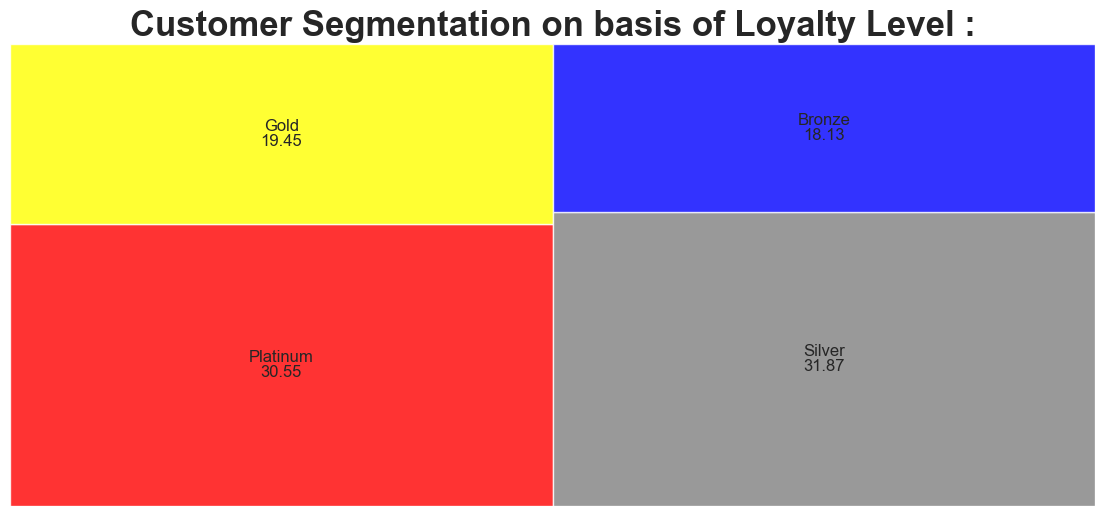

In [118]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 6)
colors_dics = {'Platinum':'red','Gold':'yellow', 'Silver':'gray','Bronze':'blue'}

#squarify.plot(sizes = final_report1['NumBuyers'], color = colors_dics.values(),label = ['{} \n{0.0f} customers \n{}%'.format(*final_report1.iloc[i]) for i in range(0, len(final_report1))], alpha=0.6)

squarify.plot(sizes=final_report1['NumBuyers'],color = colors_dics.values(), label = ['Platinum','Gold','Silver','Bronze'], alpha=0.8,
             value=final_report1['Percent'])
plt.title("Customer Segmentation on basis of Loyalty Level :", fontsize=25, fontweight='bold')
plt.axis('off')
plt.show()